# 1. Introduction
Harmful use of alcohol causes more than 5% of the global disease burden. The death of more than [3 million people](https://www.who.int/news-room/detail/21-09-2018-harmful-use-of-alcohol-kills-more-than-3-million-people-each-year--most-of-them-men) a year is caused by the substance. Simultaneously it is source of a [1344 billion dollar industry](https://www.statista.com/statistics/696641/market-value-alcoholic-beverages-worldwide/), and an important cultural factor. This makes it a highly important, and highly complex, matter for regulators which have to take into account many aspects when creating policies.

The goal of this notebook is to aggregate different alcohol control policies to understand which are the most common and test the correlation between alcohol consumption and different alcohol control policies


In [94]:
# import libraries
import os
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import mglearn

ModuleNotFoundError: No module named 'mglearn'

In [3]:
ls

Country_religion/                     projectdata/
dataprocessed/                        README.md*
HFA_426_EN.csv                        report/
Policies_create_whole_database.ipynb  WHO_policy_timeline_edited/
Policies.ipynb


In [4]:
#file_path_definitions
Age_limits_CSV_FILE_PATH = 'projectdata/Age_limits.csv'
Public_use_CSV_FILE_PATH = 'projectdata/Public_use.csv'
Liscence_retail_CSV_FILE_PATH = 'projectdata/Licence_retail.csv'  # bool influence the retail sales first
Liscence_production_CSV_FILE_PATH = 'projectdata/Licence_production.csv'
Tax_CSV_FILE_PATH = 'projectdata/Tax.csv'   # bool
Community_actions_CSV_FILE_PATH = 'projectdata/Community_action.csv'  #  bool
Health_warning_CSV_FILE_PATH = 'projectdata/Health_warning.csv'
Comsumption_CSV_FILE_PATH = 'projectdata/Consumption.csv'
Countries_list_PATH = 'dataprocessed/Country_list_final.csv'

In [5]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

1. We have divided all the countries in the database into eight parts according to the United Nations geographical division criteria.
2. This is because we take into account that countries in the same region have similar political conditions, living habits and cultural background, such as countries in the EU, while countries in different regions are quite different in these aspects.
3. Therefore, our subsequent analysis will be based on the results of the following country segmentation.

# 2. Preprocessing
## 2.1 Tools to preprocess

In [6]:
def process_text(origin_text):
    new_text = origin_text.capitalize()
    new_text = ''.join(new_text.split('-'))
    new_text = ''.join(new_text.split(' '))
    return new_text

In [7]:
def process_country_name(Filename, newFile_path, column):
    df = pd.read_csv(Filename, header=None, sep=',')
    print(df.shape)
    for row in df.iterrows():
        country_name = row[1][column]
        row[1][column]=process_text(country_name)
    df.to_csv(newFile_path, header=None, index=False, sep=',')

In [8]:
def dict_country_code(inputcountry):
    with open(Countries_list_PATH,'r',encoding="utf-8") as f:
        reader = csv.reader(f)
        fieldnames = next(reader) #get first row，as key for the dictionary get from generator next
#         print("fieldnames", fieldnames)
        csv_reader = csv.DictReader(f,fieldnames=fieldnames) #self._fieldnames = fieldnames   # list of keys for the dict 以list的形式存放键名
        for row in csv_reader:
#             print(row)
            d = {}
            for k,v in row.items():
                d[k]=v
            if d['Country']==inputcountry:
                outputcode = d['Code']
#                 print("Succeed! Replaced with", outputcode)
                return(outputcode)
#         print("Error! Cannot find country", inputcountry)
        return False

In [9]:
def dict_country_region(inputcountry):
    with open(Countries_list_PATH,'r',encoding="utf-8") as f:
        reader = csv.reader(f)
        fieldnames = next(reader) #get first row，as key for the dictionary get from generator next
#         print("fieldnames", fieldnames)
        csv_reader = csv.DictReader(f,fieldnames=fieldnames) #self._fieldnames = fieldnames   # list of keys for the dict 以list的形式存放键名
        for row in csv_reader:
#             print(row)
            d = {}
            for k,v in row.items():
                d[k]=v
            if d['Country']==inputcountry:
                outputregion = d['Region']
#                 print("Succeed! Replaced with", outputcode)
                return(outputregion)
#         print("Error! Cannot find country", inputcountry)
        return False

In [10]:
def dict_country_religion(inputcountry):
    with open(Countries_list_PATH,'r',encoding="utf-8") as f:
        reader = csv.reader(f)
        fieldnames = next(reader) #get first row，as key for the dictionary get from generator next
#         print("fieldnames", fieldnames)
        csv_reader = csv.DictReader(f,fieldnames=fieldnames) #self._fieldnames = fieldnames   # list of keys for the dict 以list的形式存放键名
        for row in csv_reader:
#             print(row)
            d = {}
            for k,v in row.items():
                d[k]=v
            if d['Country']==inputcountry:
                outputreligion = d['Religion']
#                 print("Succeed! Replaced with", outputcode)
                return(outputreligion)
#         print("Error! Cannot find country", inputcountry)
        return False

In [11]:
# test function dict_country 
print(dict_country_region('Switzerland'))

Western European and Others Group


In [12]:
# # preprocess every file into country code
# def add_country_code(Filename, newFile_path):
#     df = pd.read_csv(Filename, header=None, sep=',')
#     df['CountryCode']='none'
#     # print(df.columns)
#     print(df.shape)
#     success_count = 0
#     for row in df.iterrows():
#         country_name = row[1][0]
#     #     print("Country name:", country_name)
#         outputcode = dict_country_code(country_name)
#         if(outputcode!=False):
#             row[1]['CountryCode']=outputcode
#             success_count = success_count + 1
#     print("Successfully Converted:", success_count)
#     # print(df.head())
#     df.to_csv(newFile_path,index=False,sep=',')

In [13]:
# country_to_code(Age_limits_CSV_FILE_PATH, "./dataprocessed/Age_limits_processed.csv")
# country_to_code(Public_use_CSV_FILE_PATH, "./dataprocessed/Public_use_processed.csv")

In [14]:
# preprocess add region and religion to each row
def add_code_region_religion(Filename, newFile_path):
    df = pd.read_csv(Filename, header=None, sep=',')
    df['CountryCode']='none'
    df['Region']='none'
    df['Religion']='none'
    print(df.shape)
    success_count = 0
    for row in df.iterrows():
        country_name = row[1][0]
        country_name = process_text(country_name)
        outputcode = dict_country_code(country_name)
        outputregion = dict_country_region(country_name)
        outputreligion = dict_country_religion(country_name)
        if outputregion!=False and outputreligion!=False:
            row[1][0]=country_name
            row[1]['CountryCode']=outputcode
            row[1]['Region']=outputregion
            row[1]['Religion']=outputreligion
            success_count = success_count + 1
    print("Successfully Converted:", success_count)
    df.to_csv(newFile_path,index=False,sep=',')

In [15]:
'''
use this only when column name is split between the 2 forst rows
merges the two first rows of the csv table into new column name
'''
def merge_col_names(input_path, output_path, row = [0,1]): # column name are in row 1 and 2
    df = pd.read_csv(input_path, header=None, sep=',')
    new_col_names=[]
    for column_name, _ in df.iteritems():
        # checks if the names are different
        if not df.loc[row[0]][column_name] == df.loc[row[1]][column_name]:
            new_col_names.append(df.loc[row[0]][column_name] + ',' + df.loc[row[1]][column_name])
        else:
            new_col_names.append(df.loc[row[0]][column_name])
    df.columns = new_col_names
    df=df.drop(labels=0, axis='rows')
    df=df.drop(labels=1, axis='rows')
    df.to_csv(output_path, sep=',', header=True, index=False, mode='w')
    

# scales the dataframe to the range
def rescale_data(df, feature_range=(0,1)):
    mm_scaler = MinMaxScaler(feature_range=feature_range)
    df_mm = mm_scaler.fit_transform(df)
    return pd.DataFrame(df_mm)

## 2.2 Data preprocess

In [16]:
process_country_name(Countries_list_PATH, "./dataprocessed/Country_list_final.csv", 2)

(177, 5)


In [17]:
process_country_name(Age_limits_CSV_FILE_PATH, "./dataprocessed/Age_limits_processed.csv", 0)

(196, 8)


In [18]:
add_code_region_religion("./dataprocessed/Age_limits_processed.csv", "./dataprocessed/Age_limits_processed.csv")

(196, 11)
Successfully Converted: 162


In [19]:
def text_to_bool():
    df = pd.read_csv(Filename, header=None, sep=',')

In [20]:
add_code_region_religion(Age_limits_CSV_FILE_PATH, "./dataprocessed/Age_limits_processed.csv")

(196, 11)
Successfully Converted: 162


In [21]:
## PREPROCESSING AGE LIMITS

## output
# dataframe 1: age_limit, contains the whole data
# dataframe 2: age_limit_num, after dropping missing data

## list of heuristics
HEURISTIC_TOTAL_BAN = 50

# merges column name
merge_col_names(Age_limits_CSV_FILE_PATH, 'dataprocessed/Age_limits_processed.csv')

# reads
age_limit = pd.read_csv('dataprocessed/Age_limits_processed.csv')

# creates short-cut for column with data specific to age limit
columns_data = list(age_limit.columns)[2:] # without county and year

# lists unique values in the data frame
val1 = pd.Series()
for column in age_limit.columns[2:]:
    val2 = pd.Series(age_limit[column].unique())
    val1 = val1.append(val2)
value_span = list(val1.unique())
# print('List of unique values in this data frame: ', value_span)

# sanitizes age_limit
age_limit = age_limit.replace({'total ban': 'Total ban', 
                               'subnational': 'Subnational'})

# puts all values to numbers or NaN
age_limit_num = age_limit.replace({'Total ban': HEURISTIC_TOTAL_BAN,
                                   'None':0,
                                   'Subnational': np.nan,
                                   'No data': np.nan})

# drops rows if it contains NaN
# age_limit_num = age_limit_num.dropna(how='any')
# print('Shape after removing non-numeric values', age_limit_num.shape)
# age_limit_num = age_limit_num.reset_index(drop=True)

# sets the dataframe specific data to float
age_limit_num[columns_data] = age_limit_num[columns_data].astype(dtype=float)

# scales the dataframe specific data  between 0 and 1
age_limit_num[columns_data] = rescale_data(age_limit_num[columns_data])

# to csv
age_limit_num.to_csv('dataprocessed/Age_limits_processed.csv', 
                     sep=',', 
                     header=True,
                     index=False,
                     mode='w')

age_limit_num.head()

,Country,Year,"Age limits off-premise sales, Beer","Age limits off-premise sales, Wine","Age limits off-premise sales, Spirits","Age limits on-premise service, Beer","Age limits on-premise service, Wine","Age limits on-premise service, Spirits"
0,Afghanistan,2016,1.00,1.00,1.00,1.00,1.00,1.00
1,Albania,2016,0.36,0.36,0.36,0.36,0.36,0.36
2,Algeria,2016,0.36,0.36,0.36,0.36,0.36,0.36
3,Andorra,2016,0.36,0.36,0.36,0.36,0.36,0.36
4,Angola,2016,0.36,0.36,0.36,0.36,0.36,0.36


## 2.3 Data agglomeration

In [22]:
ls dataprocessed/

Age_limits_processed.csv          Liscence_production_processed.csv*
Community_actions_processed.csv*  Liscence_retail_processed.csv*
Country_list.csv                  Public_use_processed.csv*
Country_list_final.csv            Tax_processed.csv*
Health_warning_processed.csv*


In [23]:
# creates one DataFrame with all policies
al = pd.read_csv('dataprocessed/Age_limits_processed.csv')
ca = pd.read_csv('dataprocessed/Community_actions_processed.csv')
hw = pd.read_csv('dataprocessed/Health_warning_processed.csv')
lp = pd.read_csv('dataprocessed/Liscence_production_processed.csv')
lr = pd.read_csv('dataprocessed/Liscence_retail_processed.csv')
tp = pd.read_csv('dataprocessed/Tax_processed.csv')
pu = pd.read_csv('dataprocessed/Public_use_processed.csv')

df_policy_rough = al.set_index(['Country','Year']).join([ca.set_index(['Country','Year']), 
                                                  hw.set_index(['Country','Year']),
                                                  #lp.set_index(['Country','Year']), # WHY? LOOK FOR ##1## !!
                                                  lr.set_index(['Country','Year']),
                                                  tp.set_index(['Country','Year']),
                                                  pu.set_index(['Country','Year'])],
                                                  how='outer')
df_policy_rough = df_policy_rough.reset_index('Year')
df_policy_rough = df_policy_rough.drop(labels='Year', axis='columns')


In [24]:
##1## REMARK
# TODO: The data wasn't process well, still Tota ban, what does it mean?
# lists unique values in the data frame
df = pd.read_csv(Liscence_production_CSV_FILE_PATH)
val1 = pd.Series()
for column in df.columns[2:]:
    val2 = pd.Series(df[column][1:].unique())
    val1 = val1.append(val2)
value_span = list(val1.unique())
value_span

['No data', 'Yes', 'No', 'Total ban']

In [25]:
## handling missing values

# drop countries where there is no data
df_policy=df_policy_rough.dropna(axis='rows', how='all')

print('Number of countries with data about policies :', df_policy.shape[0])

# maybe plot this so that we can visualize it
df_policy.count()

Number of countries with data about policies : 176


Age limits off-premise sales, Beer              170
Age limits off-premise sales, Wine              170
Age limits off-premise sales, Spirits           170
Age limits on-premise service, Beer             170
Age limits on-premise service, Wine             170
Age limits on-premise service, Spirits          170
Government support, Earmarked funds             172
Government support, Technical tools             172
Government support, Training programmes         172
Government support, At-risk groups targeted     172
Government support, Community programmes        172
Government support, Provision of information    172
Government support, Data dissemination          172
Government support, Research studies            172
Health warning labels                           164
Licence for retail sales, Beer                  158
Licence for retail sales, Wine                  158
Licence for retail sales, Spirits               158
Tax on Beer                                     165
Tax on Wine 

In [26]:
#check the types
df_policy.dtypes

Age limits off-premise sales, Beer              float64
Age limits off-premise sales, Wine              float64
Age limits off-premise sales, Spirits           float64
Age limits on-premise service, Beer             float64
Age limits on-premise service, Wine             float64
Age limits on-premise service, Spirits          float64
Government support, Earmarked funds             float64
Government support, Technical tools             float64
Government support, Training programmes         float64
Government support, At-risk groups targeted     float64
Government support, Community programmes        float64
Government support, Provision of information    float64
Government support, Data dissemination          float64
Government support, Research studies            float64
Health warning labels                           float64
Licence for retail sales, Beer                  float64
Licence for retail sales, Wine                  float64
Licence for retail sales, Spirits               

As there is a low number of missing data, we choose to impute the missing values with mean so as to keep as much meaningful data as possible

In [27]:

df_policy.fillna(df_policy.mean(), inplace=True)
df_policy.count()

/home/tomas/anaconda3/envs/ada/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Age limits off-premise sales, Beer              176
Age limits off-premise sales, Wine              176
Age limits off-premise sales, Spirits           176
Age limits on-premise service, Beer             176
Age limits on-premise service, Wine             176
Age limits on-premise service, Spirits          176
Government support, Earmarked funds             176
Government support, Technical tools             176
Government support, Training programmes         176
Government support, At-risk groups targeted     176
Government support, Community programmes        176
Government support, Provision of information    176
Government support, Data dissemination          176
Government support, Research studies            176
Health warning labels                           176
Licence for retail sales, Beer                  176
Licence for retail sales, Wine                  176
Licence for retail sales, Spirits               176
Tax on Beer                                     176
Tax on Wine 

We identify three different means used by states to reduce the alcohol consumption:
* charge money for alcohol production, retail and consumption
* make the population aware of the dangers of alcohol
* restrict access to alcohol

In [28]:
# Grouping policies
groups = ['Charges', 'Awareness','Restrictions']
hierarchy = pd.DataFrame(columns=groups)
hierarchy

,Charges,Awareness,Restrictions


In [73]:
#getting lists of columns
age_limits = list(df_policy.columns[:6])
awareness = list(df_policy.columns[7:14])
health = list(df_policy.columns[14:15])
licence = list(df_policy.columns[15:18])
charge = list(df_policy.columns[18:21])
restriction = list(df_policy.columns[21:])


In [74]:
#grouping relevant columns together
restriction.extend(age_limits)
awareness.extend(health)
awareness.extend(licence)


In [31]:
hierarchy['Charges'] = df_policy[charge].mean(axis=1)
hierarchy['Awareness'] = df_policy[awareness].mean(axis=1)
hierarchy['Restrictions'] = df_policy[restriction]
hierarchy.head(10)

,Charges,Awareness,Restrictions
Country,,,
Afghanistan,0.927273,0.232612,1.0
Albania,1.000000,0.545455,1.0
Algeria,1.000000,0.272727,1.0
Andorra,1.000000,0.272727,0.5
Angola,1.000000,0.545455,0.5
Antigua and Barbuda,0.000000,0.454545,0.3
Argentina,0.666667,0.454545,0.3
Armenia,1.000000,0.000000,1.0
Australia,1.000000,0.297468,0.3


## 3.1 Policy analysis

In this section we want to analyse what ind of policies are present in different parts of the world and understand why

In [32]:
# what is the most common approach
hierarchy.mean(axis=0)

Charges         0.927273
Awareness       0.495826
Restrictions    0.753939
dtype: float64

We can observe that in the world the most common alcohol control policy is to charge the consumer an extra fee.
This makes sense as it is the easiest  to enforce also for lower-income countries, who do not have the budget to have government programmes to reduce alcohol consumption

We look a bit closer inside each category

In [55]:
df_policy_mean = df_policy.mean()


In [101]:
bar_restriction = df_policy_mean[:6].append(df_policy_mean[15:18]).append(df_policy_mean[21:])
bar_awareness = df_policy_mean[14:15].append(df_policy_mean[7:14])
bar_charge = df_policy_mean[18:21]

Text(0, 0.5, 'percentage')

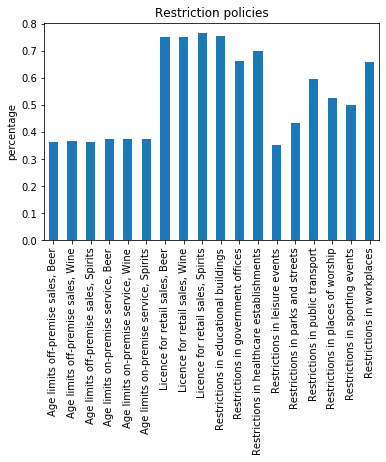

In [90]:
bar_restriction.plot(kind='bar', stacked=True)
# Add title and axis names
plt.title('Restriction policies')

plt.ylabel('percentage')
 

Text(0, 0.5, 'percentage')

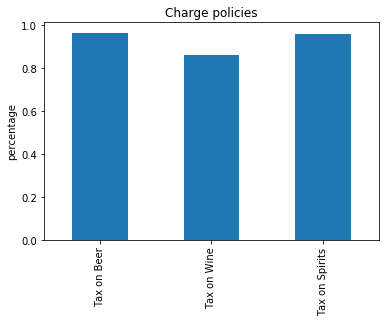

In [102]:
bar_charge.plot(kind='bar', stacked=True)
# Add title and axis names
plt.title('Charge policies')

plt.ylabel('percentage')
 

Text(0, 0.5, 'percentage')

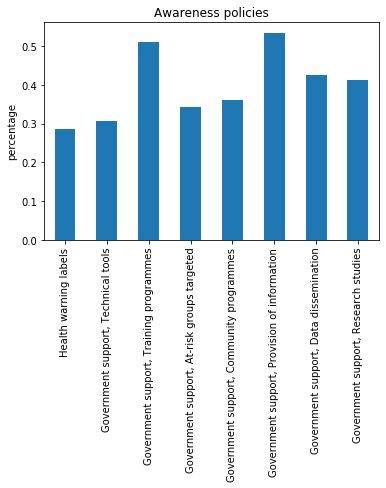

In [93]:
bar_awareness.plot(kind='bar', stacked=True)
# Add title and axis names
plt.title('Awareness policies')

plt.ylabel('percentage')

Being restriction policies a collection of many different policies there is a difference in the usage by countries of these policies. We can observe though that all these policies are not as popular as taxing alcoholic beverages

In [34]:
# plot a graph to show the relation between policy and alcohol consumption

## 3.1 DataSets Overview

**DataSet 1. Pure alcohol consumption, litres per capita, age 15+**

* Indicator full name: Pure alcohol consumption, litres per capita, age 15+

* Unit: litres per capita

* Dimensions:

* Country (COUNTRY) 

* Supranational group of countries (COUNTRY_GRP)

* Sex (SEX)

* Year of measure (YEAR)

* Years data is available: 1970—2015

In [35]:
from IPython.core.display import display, HTML
display(HTML('<iframe frameborder="0" class="whoWidget" onload="(function (){if(!document.getElementById(\'ifr\')){var s=document.createElement(\'script\');s.type=\'text/javascript\';s.id=\'ifr\';s.src=\'https://gateway.euro.who.int/Scripts/libs/iframeResizer/iframeResizer.min.js\';document.getElementsByTagName(\'head\')[0].appendChild(s);}})();" src="https://gateway.euro.who.int/en/indicators/visualization-embed/?indId=18314&visId=19443" style="width: 100%;"></iframe>'))

/home/tomas/anaconda3/envs/ada/lib/python3.7/site-packages/IPython/core/display.py:694: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


**DataSet 2.Age limits - Alcohol service/sales by country**

* Data type: Count
* Topic: Risk factors
* Rationale: One first needs to be aware of a country's laws and policies regarding alcohol before one can establish whether these influence the level and patterns of alcohol consumption in the population. Thus, the legal status of alcohol production, distribution and consumption is an important indicator.
* Definition:The legal age limit for on-premise service of alcoholic beverages is defined as the age at which a person can be served alcoholic beverages on premises in a country, i.e. alcoholic beverages cannot be served to a person under this age. The legal age limit for off-premise sales of alcoholic beverages is defined as the age at which a person can be sold alcoholic beverages off premises in a country, i.e. alcoholic beverages cannot be sold to a person under this age.
* Disaggregation: Alcoholic beverage type
* Method of estimation: The national authorities of a given country respond to the Global Survey on Alcohol and Health.
* Expected frequency of data dissemination:Periodic
* Expected frequency of data collection:Periodic

Short name: Age limits on-/off-premise sales

Short name:Age limits on-/off-premise service

Total countries:194

In [36]:
from IPython.core.display import display, HTML
display(HTML('<iframe id=\'rightframe\' name=\'leftiframe\' width="70%" src=\'http://apps.who.int/gho/data/node.main.A1144\'></iframe><br>'))

**DataSet 3.License requirement for alcohol production and retail sales**

* Short name: Licensing
* Data type: Categorical
* Topic: Risk factors
* Rationale: One first needs to be aware of a country's laws and policies regarding alcohol before one can establish whether these influence the level and patterns of alcohol consumption in the population. Thus, the legal status of alcohol production, distribution and consumption is an important indicator.
* Definition: Licensing is defined as the partial government control of production, and sale, wholesale and distribution of alcoholic beverages which requires licensing, as well as of import and export.
* Disaggregation: Alcoholic beverage type
* Method of estimation: The national authorities of a given country respond to the Global Survey on Alcohol and Health.
* Expected frequency of data dissemination:Periodic
* Expected frequency of data collection:Periodic

Retail sales by country

In [37]:
display(HTML('<iframe id=\'rightframe\' name=\'leftiframe\' width="70%" src=\'http://apps.who.int/gho/data/node.main.A1179\'></iframe><br>'))

Production by country

In [38]:
display(HTML('<iframe id=\'rightframe\' name=\'leftiframe\' width="70%" src=\'http://apps.who.int/gho/data/node.main.A1178\'></iframe><br>'))

## 3.1 Age-limit v.s. Pure alcohol consumption

In [39]:
df = pd.read_csv("./dataprocessed/Consumption_processed.csv", names=['Country', '2015-2017', '2009-2011', 'Age limits Beer'])
print(df.head(10))
print(df.columns)

FileNotFoundError: [Errno 2] File b'./dataprocessed/Consumption_processed.csv' does not exist: b'./dataprocessed/Consumption_processed.csv'

In [ ]:
df.dtype

In [ ]:
df_test = df[2:12]
plt.bar(df_test['Country'], df_test['2015-2017']) # plot
plt.xticks(rotation=30)

In [ ]:
# name_list = ['Monday','Tuesday','Friday','Sunday']
# num_list = [1.5,0.6,7.8,6]
# num_list1 = [1,2,3,1]
# x =list(range(len(num_list)))
total_width, n = 0.8, 2
width = total_width / n
 
plt.bar(df_test['Country'], df_test['2015-2017'], width=width, label='consumption',fc = 'y')
for item in df_test['Country']:
    item = item + width
plt.bar(x, df_test['Age limits Beer'], width=width, label='Age_limits',tick_label = df_test['Country'],fc = 'r')
plt.xticks(rotation=30)
plt.legend()
plt.show()